In [12]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, geom_boxplot,geom_violin, geom_histogram, geom_point, scale_x_log10, scale_size_area, scale_size_continuous, scale_fill_manual, theme, scale_y_continuous, scale_x_continuous, labs, scale_color_manual, annotate, scale_y_log10, geom_density, facet_wrap
from plotnine.options import figure_size
import matplotlib.pyplot as plt

In [2]:
#!pip install "numpy<1.24"
#np.__version__

'1.23.5'

# Task 1



### Part 1



Aesthetics:

* position (x/y)
* size
* fill

Variables:

* position x: income
* position y: life expectancy
* size: population
* fill: world region



### Parts 2 & 3

In [13]:
q1 = pd.read_csv(r"C:\Users\eevee\OneDrive\Desktop\MLClass\Week1\Lab1\q1data.csv")
q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [15]:
#drop rows where the region is NaN
q1 = q1.dropna(subset=['four_regions'])

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


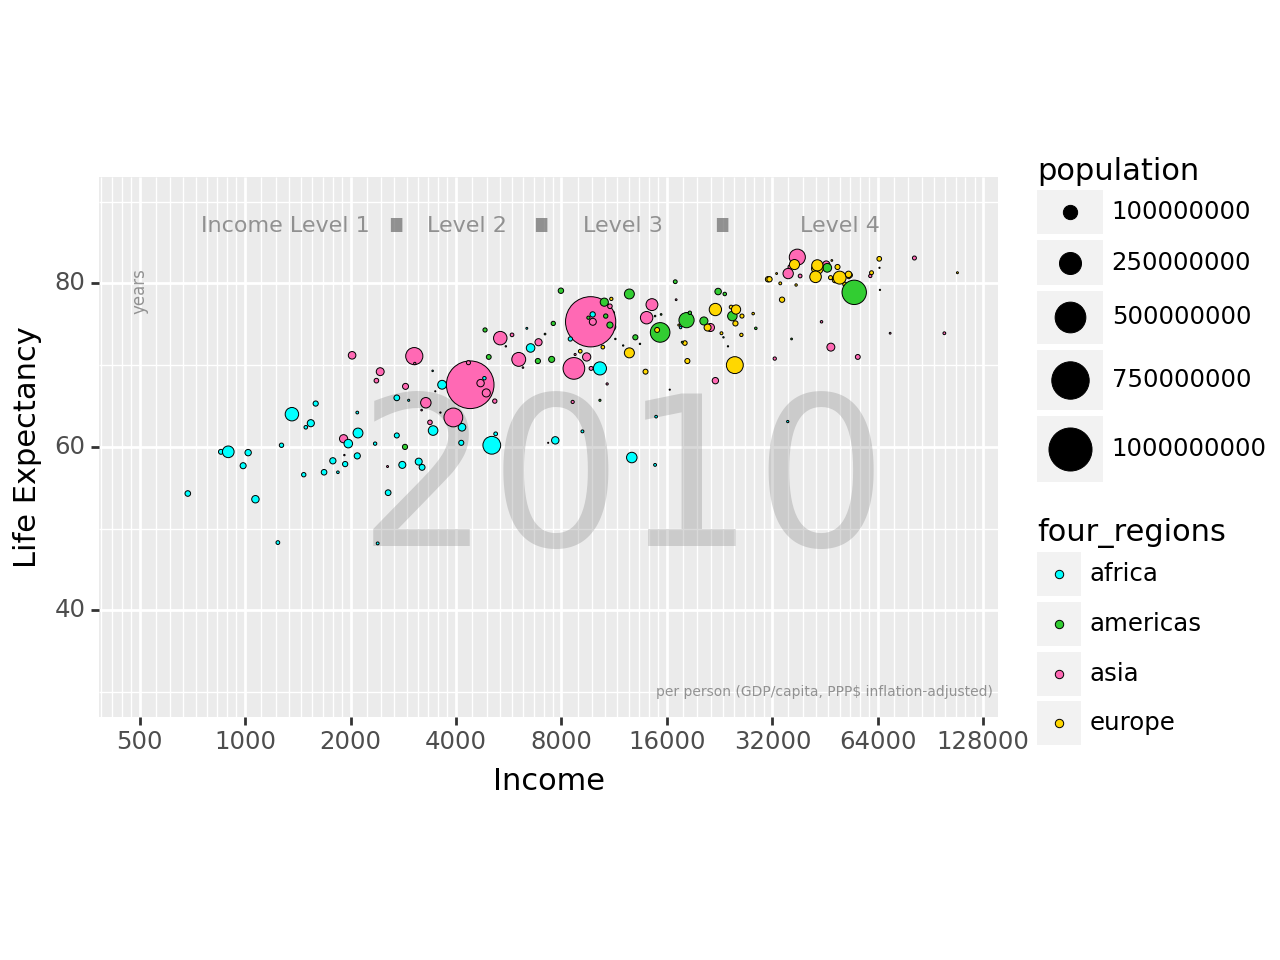

<Figure Size: (640 x 480)>

In [16]:
p = (ggplot(q1, aes(x='income', y='life_exp', fill='four_regions', size='population'))
     + annotate("text", x=12000, y=55, label="2010", size=75, color="gray", alpha=0.3)
     + annotate("text", x=45000, y=30, label="per person (GDP/capita, PPP$ inflation-adjusted)", size=5, color="dimgray", alpha=0.7)
     + annotate("text", x=500, y=79, label="years", size=6, color="dimgray", alpha=0.7, angle=90)
     + annotate("text", x=1300, y=87, label="Income Level 1", size=8, color="dimgray", alpha=0.7)
     + annotate("text", x=2700, y=90, label=".", size=40, color="dimgray", alpha=0.7)
     + annotate("text", x=4300, y=87, label="Level 2", size=8, color="dimgray", alpha=0.7)
     + annotate("text", x=7000, y=90, label=".", size=40, color="dimgray", alpha=0.7)
     + annotate("text", x=12000, y=87, label="Level 3", size=8, color="dimgray", alpha=0.7)
     + annotate("text", x=23000, y=90, label=".", size=40, color="dimgray", alpha=0.7)
     + annotate("text", x=50000, y=87, label="Level 4", size=8, color="dimgray", alpha=0.7)
     + geom_point(color='black', stroke=0.2)
     + scale_x_log10(breaks=[500,1000,2000,4000,8000,16000,32000,64000,128000])
     + scale_y_continuous(limits=(30, None))
     + scale_size_area(max_size=10, breaks=[100000000, 250000000, 500000000, 750000000, 1000000000])
     + scale_fill_manual(values={
                                "asia": "hotpink",
                                "europe": "gold",
                                "africa": "aqua",
                                "americas": "limegreen"})
     + theme(aspect_ratio=9/15)
     +labs(y='Life Expectancy', x='Income'))
p

citation:


* https://www.geeksforgeeks.org/use-different-colors-shapes-for-scatterplot-with-two-groups-in-r/
* https://www.statology.org/geom_point-fill/
* https://www.statology.org/color-by-factor-ggplot2/
* https://www.tutorialspoint.com/how-to-change-the-aspect-ratio-of-a-plot-in-ggplot2-in-r
* https://www.statology.org/ggplot2-scale_y_continuous/
* https://www.statology.org/ggplot2-scale_x_continuous/#:~:text=You%20can%20use%20the%20scale_x_continuous,%2C%20limits%2C%20...)
* https://environmentalcomputing.net/graphics/ggplot/ggplot-labels/#:~:text=Changing%20axis%20labels,line%20of%20basic%20ggplot%20code.&text=Note%3A%20You%20can%20also%20use,which%20is%20equivalent%20to%20ggtitle%20.
* https://ggplot2.tidyverse.org/reference/annotate.html




### Part 4:

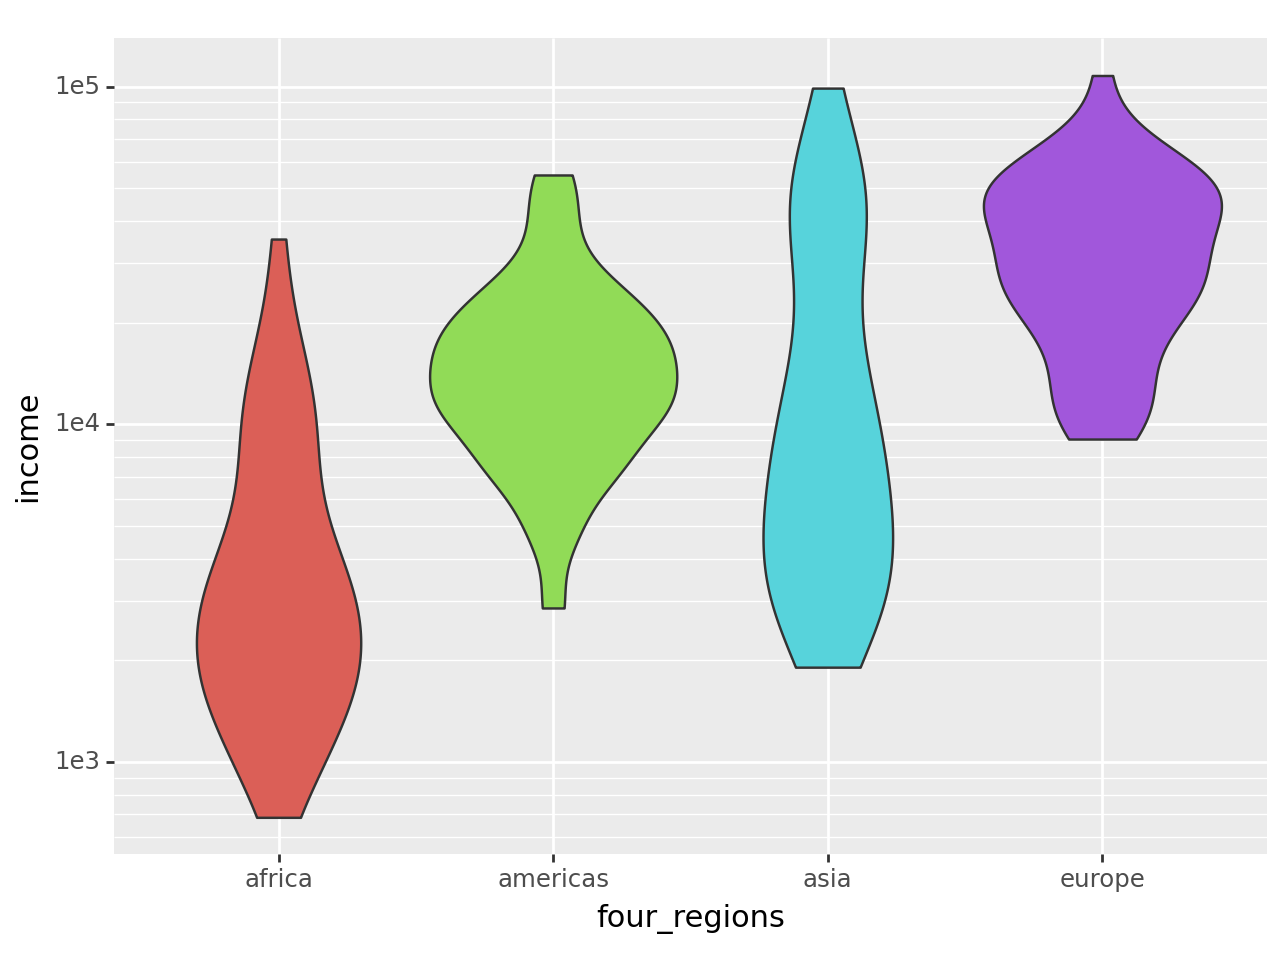

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.


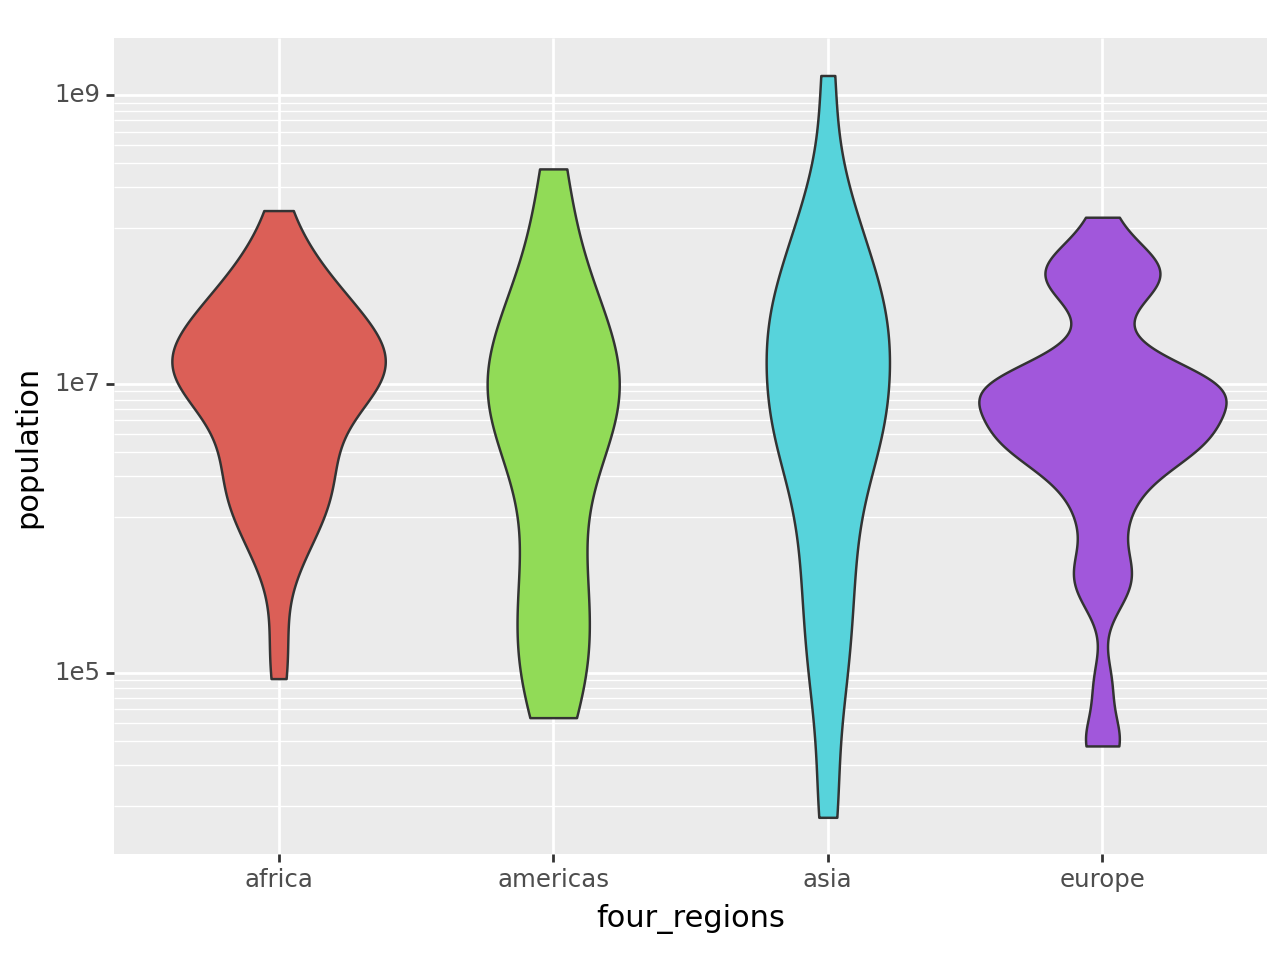

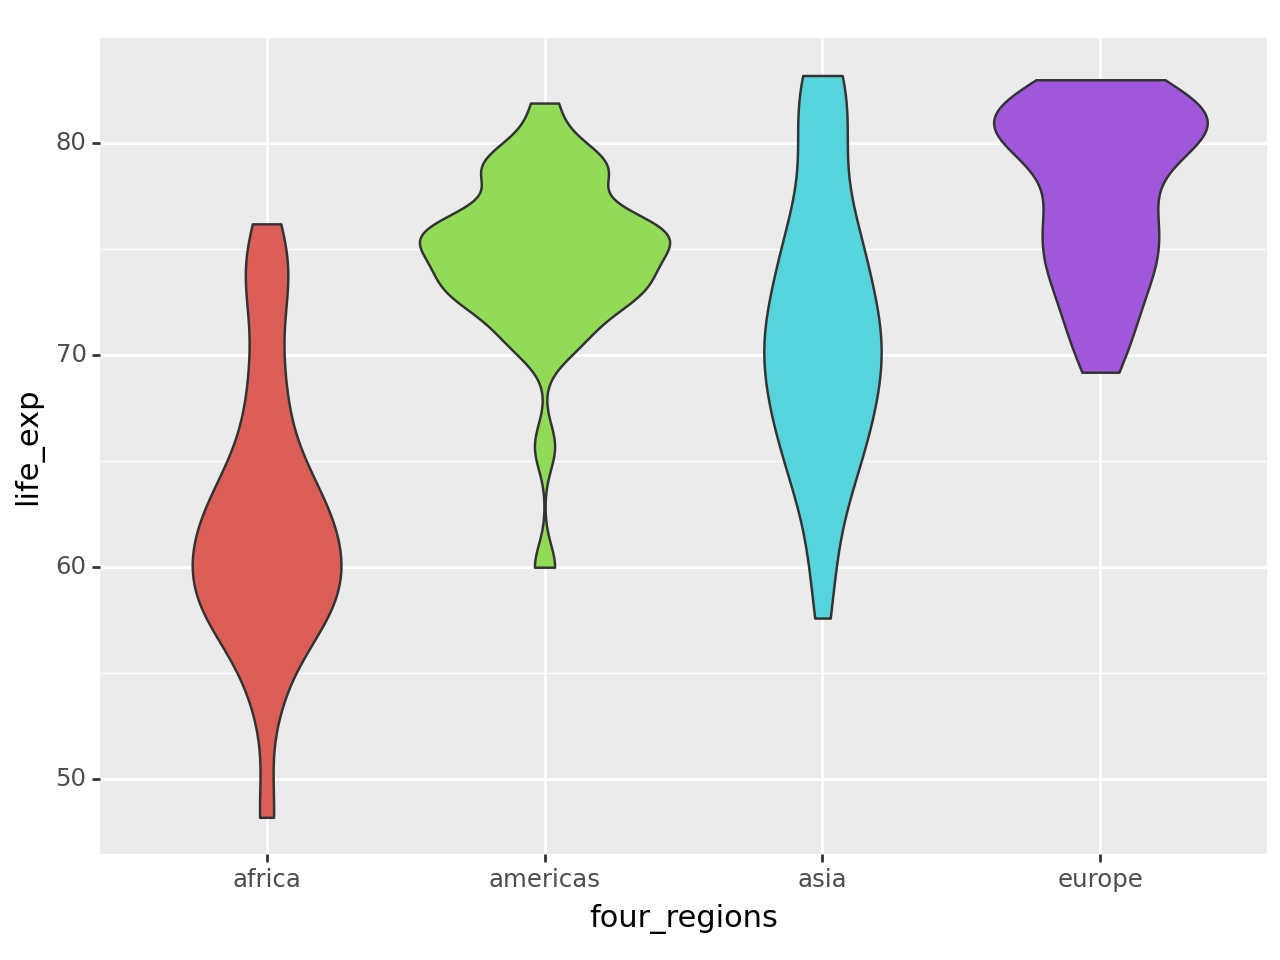

In [17]:
plot1 = (ggplot(q1, aes(x='four_regions', y='income', fill='four_regions'))
         + geom_violin(show_legend=False)
         +scale_y_log10())
plot2 = (ggplot(q1, aes(x='four_regions', y='population', fill='four_regions'))
         + geom_violin(show_legend=False)
         +scale_y_log10())
plot3 = (ggplot(q1, aes(x='four_regions', y='life_exp', fill='four_regions'))
         + geom_violin(show_legend=False))
print(plot1)
print(plot2)
print(plot3)



Violin plots are really good ways to visualize the distribution of a variable amongst different groups. It is very obvious what's going on. However, it is nice in the scatter plot that you can see the interaction of all of the variables. That is hard to accomplish with many other geometries.

citations:

* https://www.statology.org/seaborn-subplots/
* https://python-graph-gallery.com/53-control-color-of-seaborn-violinplot/
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

# Task 2

### Part 1

Aesthetics:

* position (x/y)
* size
* fill

Variables:

* position x: exports (% of GDP)
* position y: imports (% of GDP)
* size: Energy Use
* fill: world region



### Parts 2 & 3

In [18]:
q2 = pd.read_csv(r"C:\Users\eevee\OneDrive\Desktop\MLClass\Week1\Lab1\q2data.csv")
q2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [19]:
#converting numbers that are listed as, for example, '12k' to 12000
#with help from ChatGPT
q2['energy'] = q2['energy'].astype(str)
def convert_string_to_number(s):
    if s[-1] == 'k':
        return float(s[:-1]) * 1e3
    else:
        return float(s)
q2['energy'] = q2['energy'].apply(convert_string_to_number)

In [20]:
#making sure they're all floats now
q2['energy'] = q2['energy'].astype(float)

In [21]:
#removing rows where region is NaN
q2 = q2.dropna(subset=['four_regions'])

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 55 rows containing missing values.


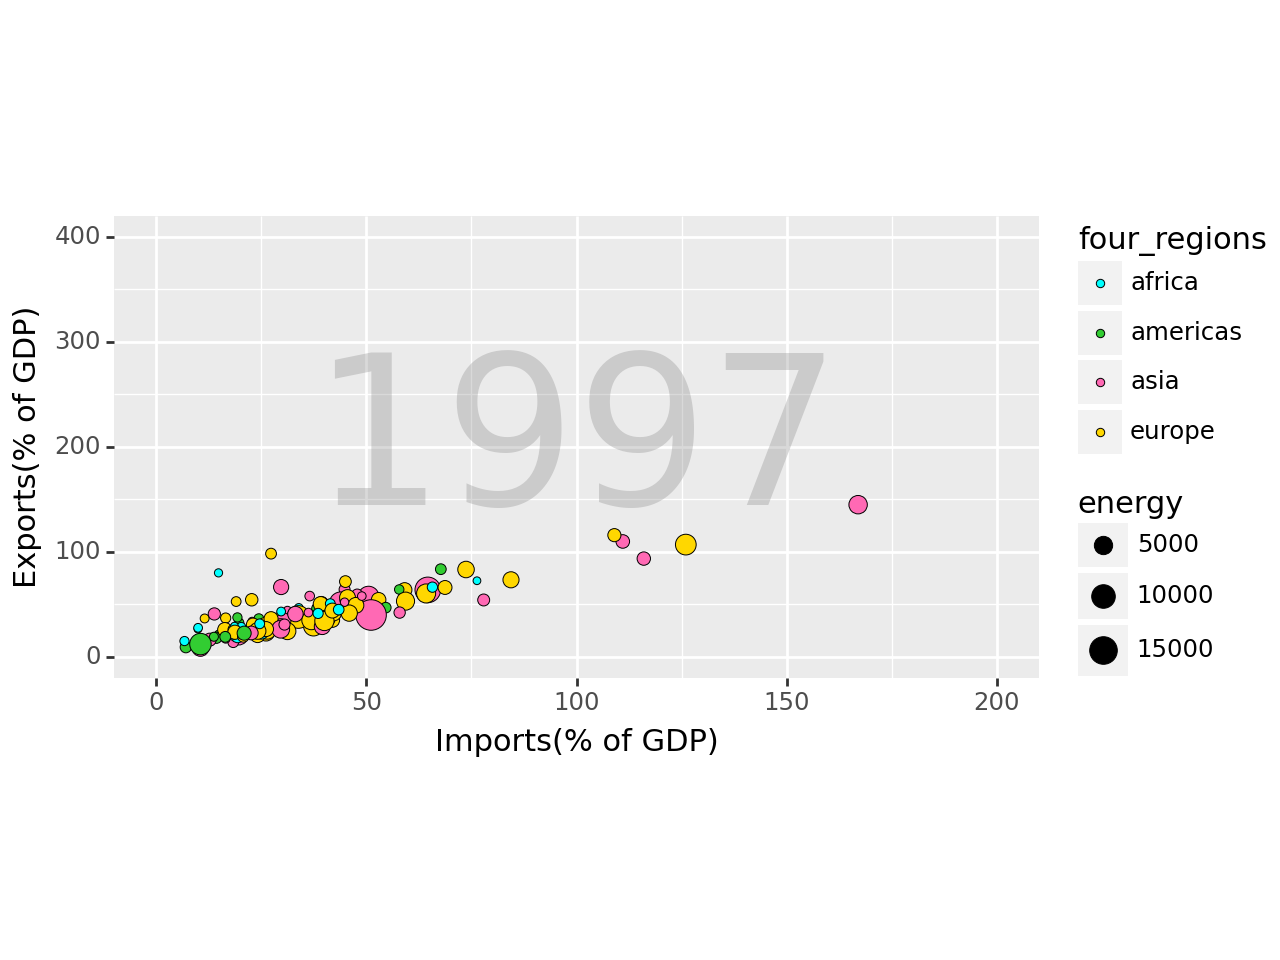

<Figure Size: (640 x 480)>

In [22]:
p = (ggplot(q2, aes(x='exports', y='imports', fill='four_regions', size='energy'))
     + annotate("text", x=100, y=200, label='1997',size=75, color='gray',alpha=0.3)
     + geom_point(color='black', stroke=0.2)
     + scale_fill_manual(values={
                                "asia": "hotpink",
                                "europe": "gold",
                                "africa": "aqua",
                                "americas": "limegreen"})
     + scale_x_continuous(limits=(0, 200))
     + scale_y_continuous(limits=(0, 400))
     + theme(aspect_ratio=9/18)
     + labs(y='Exports(% of GDP)', x='Imports(% of GDP)'))

p


ciation: similar to Task 1

### Part 4

In [23]:
plot1 = (ggplot(q2, aes(x='four_regions', y='energy', fill='four_regions'))
         + geom_boxplot())

In [24]:
plot2 = (ggplot(q2, aes(x='four_regions', y='imports', fill='four_regions'))
         + geom_boxplot())

In [25]:
plot3 = (ggplot(q2, aes(x='four_regions', y='exports', fill='four_regions'))
         + geom_boxplot())

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 51 rows containing non-finite values.


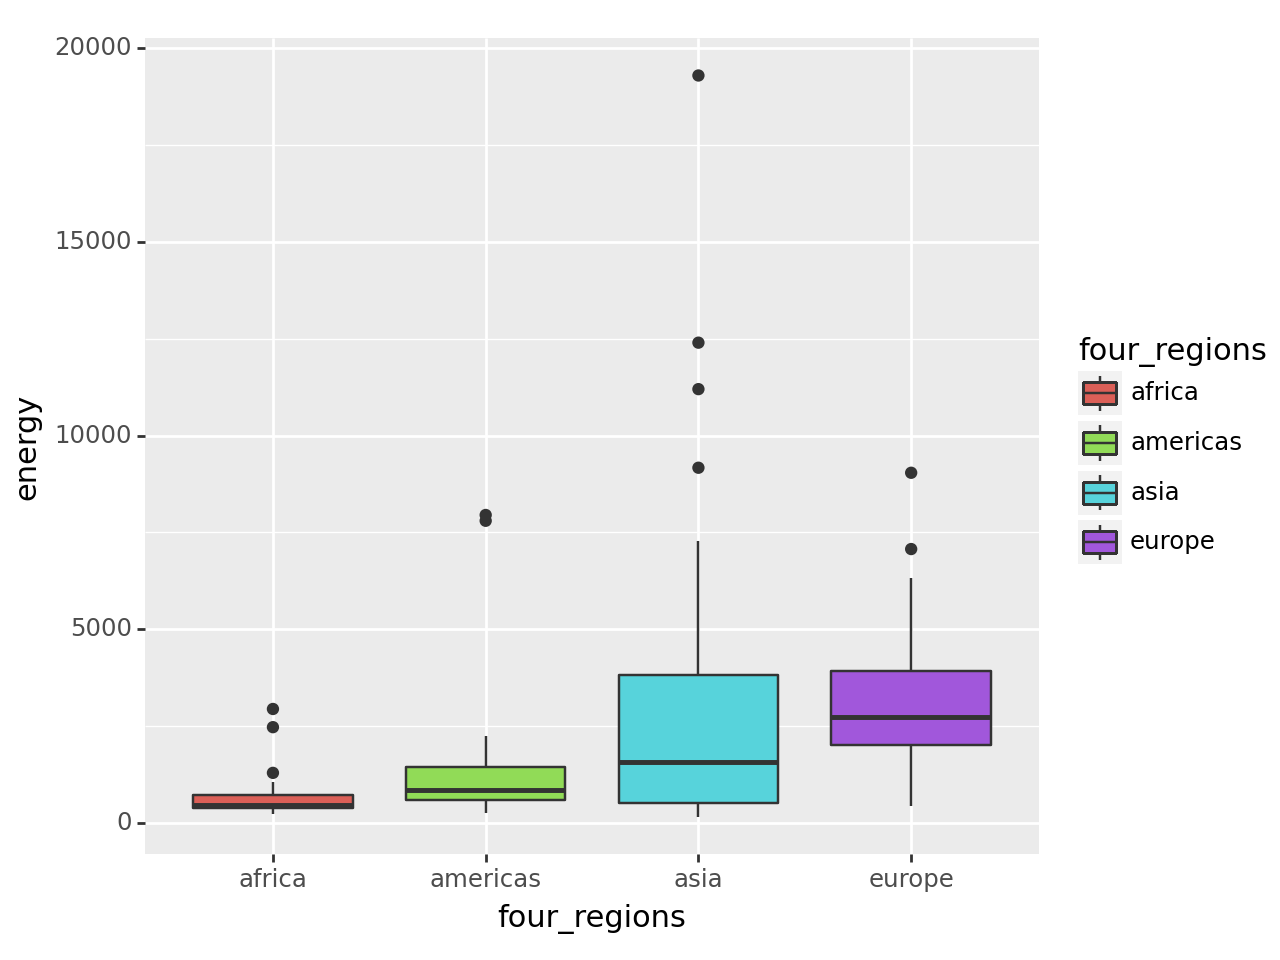

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 19 rows containing non-finite values.


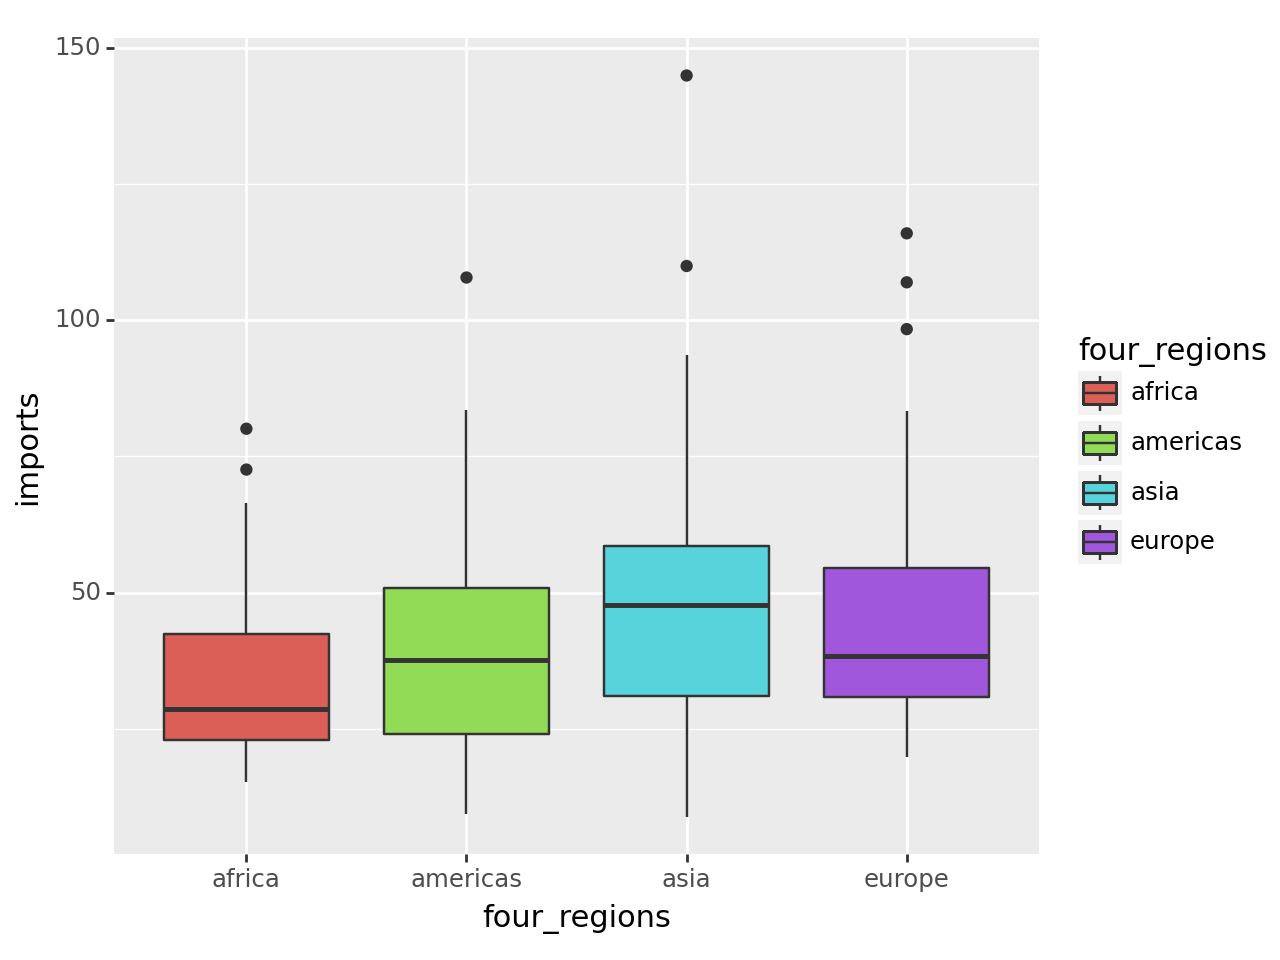

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 19 rows containing non-finite values.


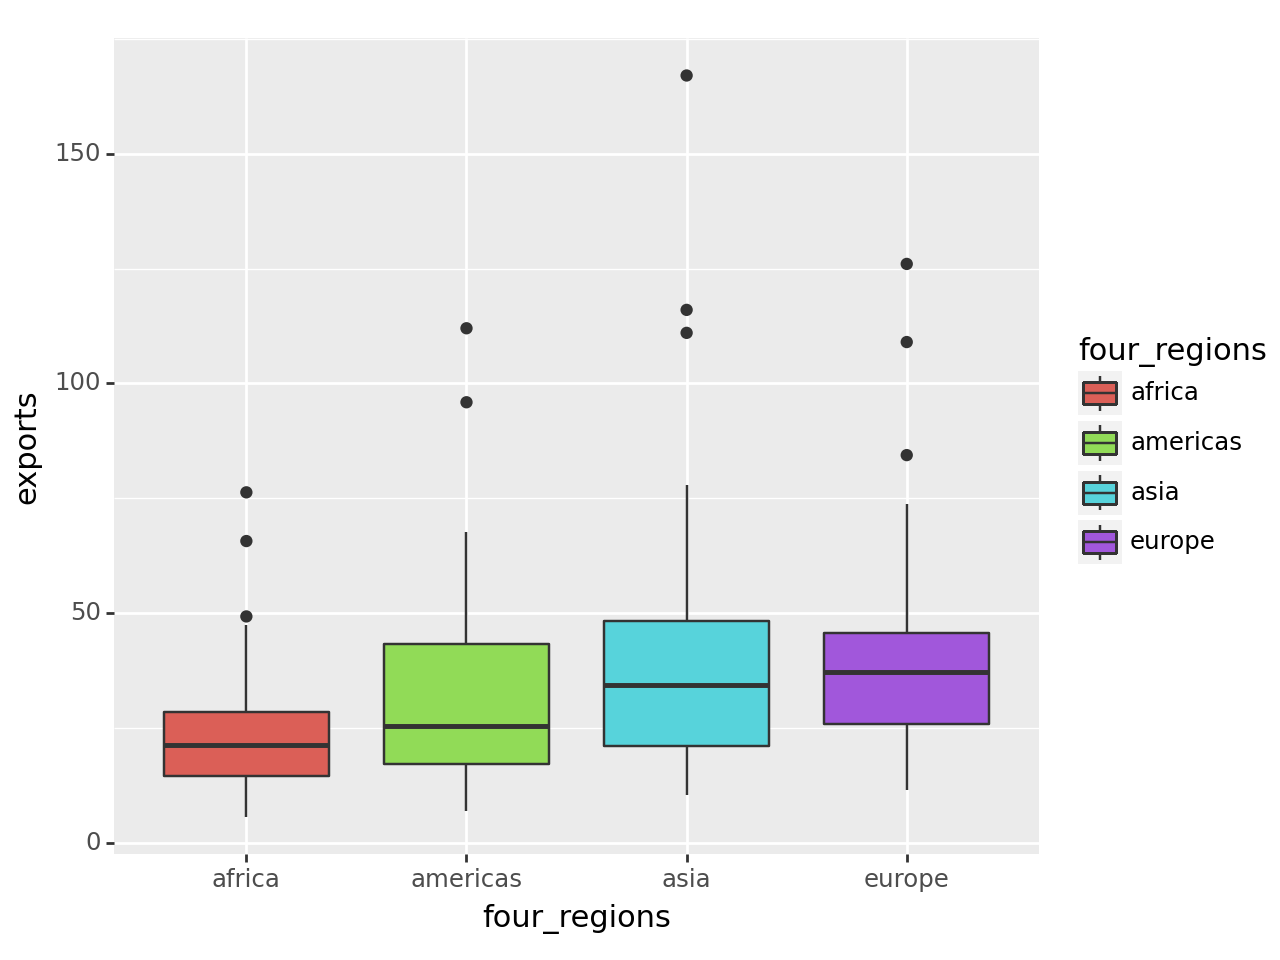

In [26]:
print(plot1)
print(plot2)
print(plot3)

Using box plots, you can visualize the energy, imports, and exports by each region next to eachother. However, it is challenging to see the interaction between variables like energy and import. On the other hand, you can clearly see the distribution of the individual variables based on the region.

citations:

* https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/
* https://www.statology.org/seaborn-subplots/

# Task 3

### Part 1

Aesthetics:

* position (x/y)
* size
* fill

Variables:

* position x: individuals using the internet (% of population)
* position y: GPD/capita
* size: Income
* fill: world region


### Parts 2&3

In [27]:
q3 = pd.read_csv(r"C:\Users\eevee\OneDrive\Desktop\MLClass\Week1\Lab1\q3data.csv")
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


In [28]:
#removing rows where region is NaN
q3 = q3.dropna(subset=['four_regions'])

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


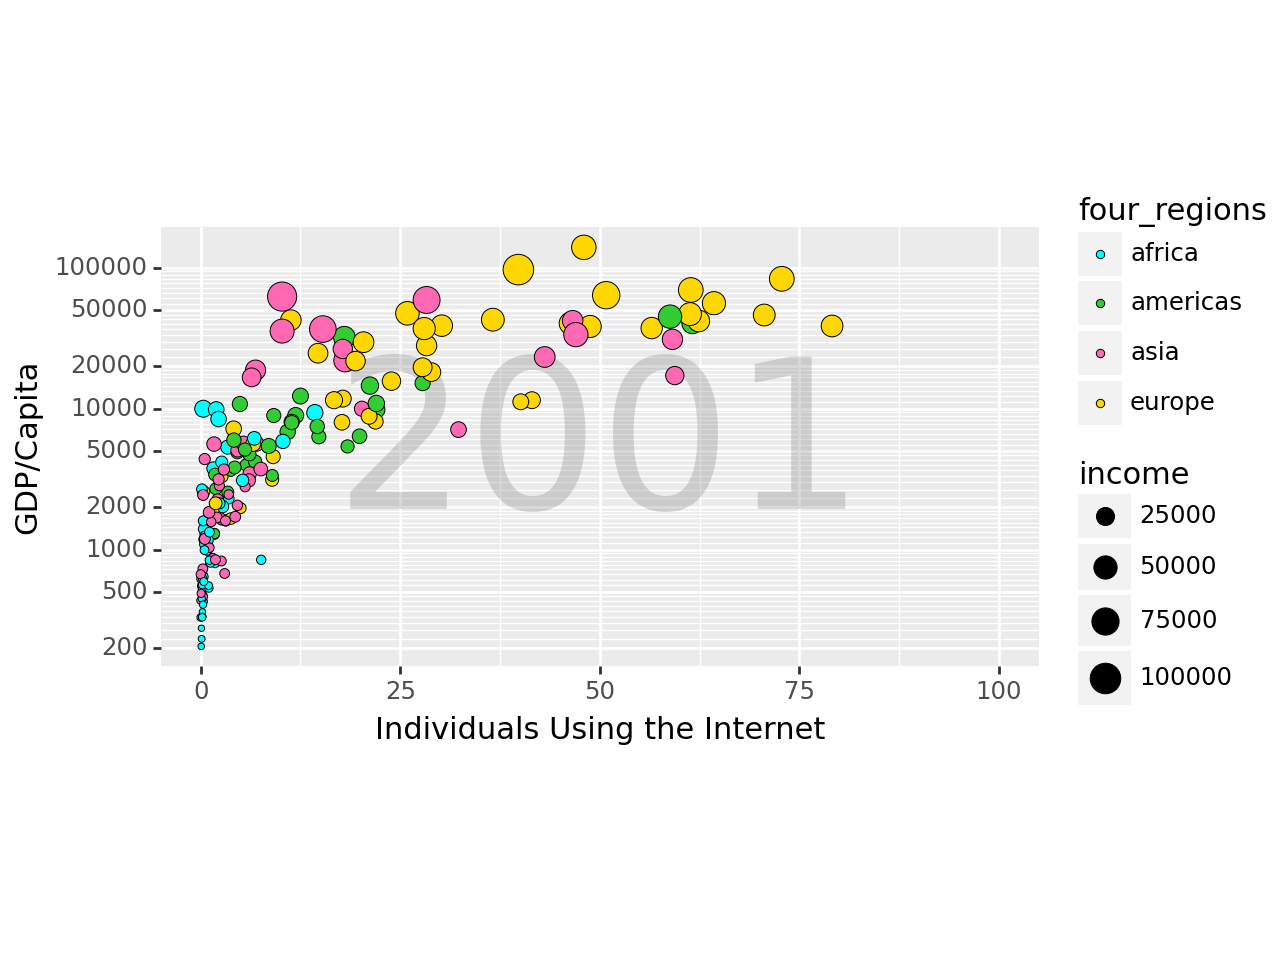

<Figure Size: (640 x 480)>

In [29]:
p = (ggplot(q3, aes(x='internet_users', y='gdp', fill='four_regions', size='income'))
     + annotate("text", x=50, y=5000, label='2001',size=75, color='gray',alpha=0.3)
     + geom_point(color='black', stroke=0.2)
     + scale_fill_manual(values={
                                "asia": "hotpink",
                                "europe": "gold",
                                "africa": "aqua",
                                "americas": "limegreen"})
     + scale_x_continuous(limits=(0, 100))
     + scale_y_log10(breaks=[200,500,1000,2000,5000,10000,20000,50000,100000])
     + theme(aspect_ratio=9/18)
     + labs(y='GDP/Capita', x='Individuals Using the Internet'))

p

citation: similar to task 1

### Part 4

In [30]:
plot1 = (ggplot(q3, aes(x='gdp', color='four_regions', fill='four_regions'))
         + geom_density(alpha=0.1)
         +scale_x_log10())

In [31]:
plot2 = (ggplot(q3, aes(x='income', color='four_regions', fill='four_regions'))
         + geom_density(alpha=0.1)
         +scale_x_log10())


In [32]:
plot3 = (ggplot(q3, aes(x='internet_users', color='four_regions', fill='four_regions'))
         + geom_density(alpha=0.1)
         +scale_x_log10())

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 7 rows containing non-finite values.


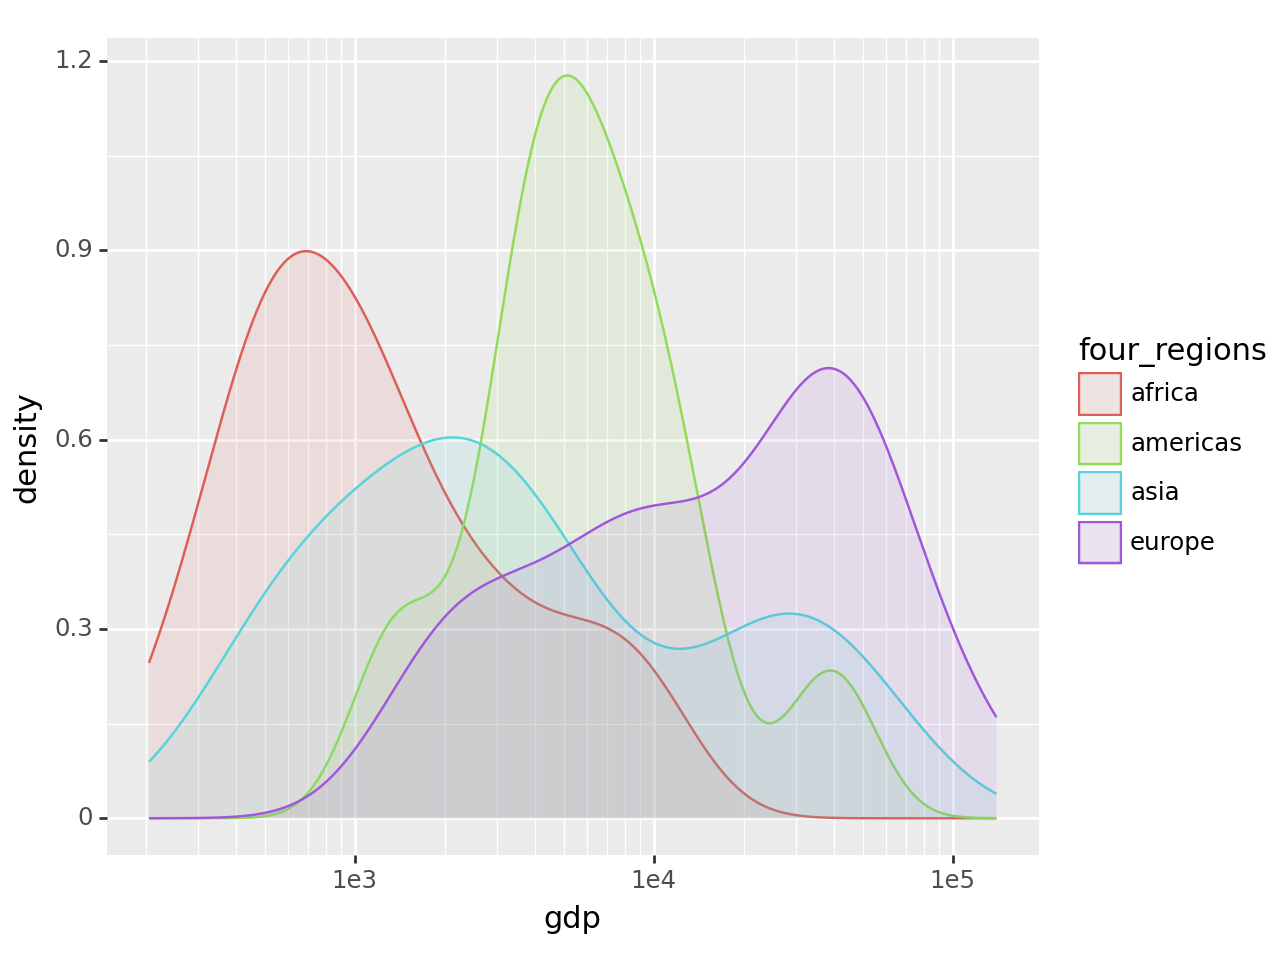

C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 1 rows containing non-finite values.


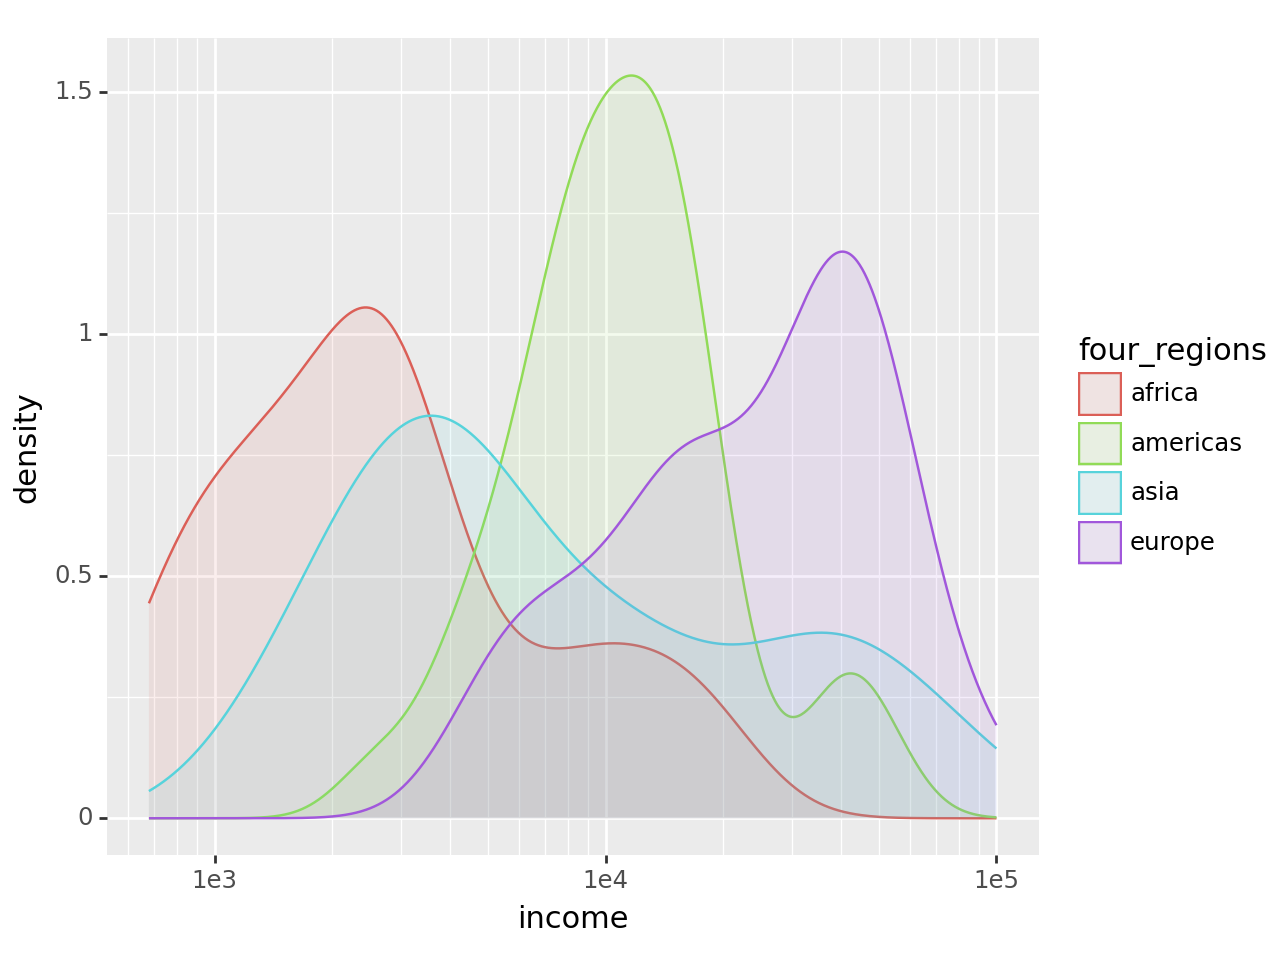

C:\Users\eevee\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
C:\Users\eevee\anaconda3\lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 9 rows containing non-finite values.


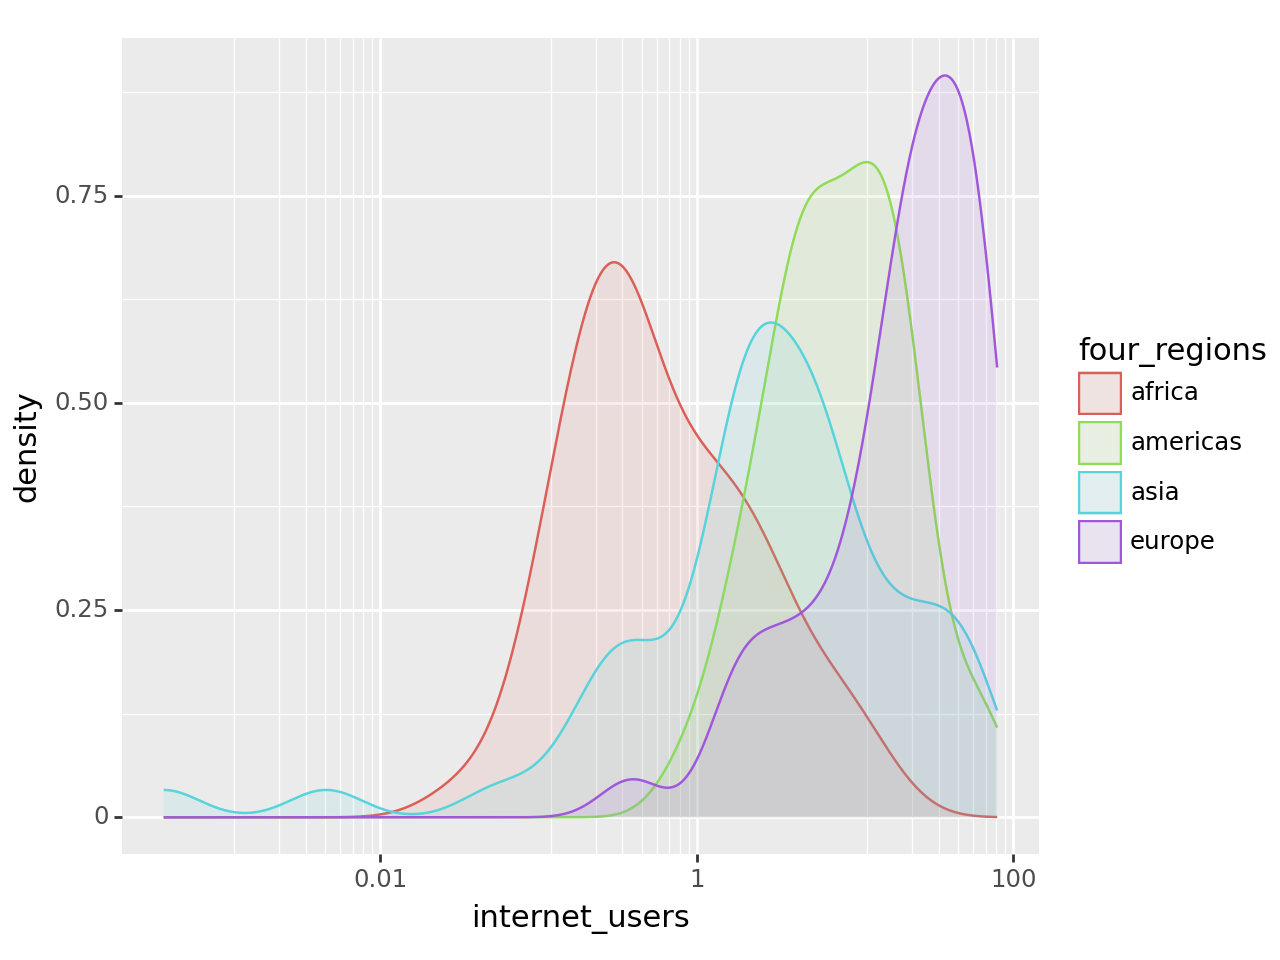

In [33]:
print(plot1)
print(plot2)
print(plot3)

citation: 

* https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_wrap.html

This plot is called a density plot. I find it helpful in that it is aesthetically pleasing, and it makes it a lot clearer that Africa has a really high density at the lowest end of the spectrum for each variable. On the other hand, it is harder to compare the interactions between the numerical variables.